## Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from bs4 import BeautifulSoup
import requests
import codecs
import os
from lxml import etree
import json
import copy



import os
os.environ["DGLBACKEND"] = "pytorch"
import torch
import dgl

In [ ]:
pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 16.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

## Основной список компаний

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/result.csv', encoding='utf-8', sep=';')

In [ ]:
data_extended = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/result_with_extra_data.csv')
data_extended.drop(['Прежние наименования', 'Телефон', 'Web', 'Руководитель', 'E-mail', 'Соцсети', 'Управляющая компания',
                    'Бенефициар', 'flag', 'Адрес.1', 'Уставный капитал', 'ОКОПФ.1', 'ИНН.1', 'ОГРН.1', 'КПП.1', 'ОКПО.1',
                    'company_file', 'industry_file', 'inn_smi_publications', 'inn_company_main_cards', 'open_orgs_checker',
                    'Другие наименования', 'Отрасль', 'Полное наименование', 'На английском', 'ОКОГУ', 'ОКТМО', 'ОКФС', 'ОКПО', 'inn_file'], axis=1, inplace=True)
data_extended = data_extended.dropna()
data_extended = data_extended.rename(columns={'Адрес':'АДРЕС', 'Полное название организации':'ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ', 'Английское название':'АНГЛИЙСКОЕ НАЗВАНИЕ', 'main_okved_id':'ОСНОВНОЙ ОКВЕД', 'main_okved_name':'НАЗВАНИЕ ОСНОВНОГО ОКВЕДА','second_okveds':'ВТОРИЧНЫЕ ОКВЕДЫ'})
data_extended['ИНН'] = data_extended['ИНН'].astype(str)
display(data_extended.head())
display(data_extended.shape)

,ОГРН,ИНН,КПП,АДРЕС,ОКОПФ,ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ,АНГЛИЙСКОЕ НАЗВАНИЕ,ОКАТО,ОСНОВНОЙ ОКВЕД,НАЗВАНИЕ ОСНОВНОГО ОКВЕДА,ВТОРИЧНЫЕ ОКВЕДЫ
0,1217700375991,9704082895,210001001,"428003, Чувашская Республика - Чувашия, г.о. г...",Общества с ограниченной ответственностью,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНЦ...","LLC ""TRACTOR PLANTS GROUP""","Чувашская Республика - Чувашия, Чебоксары",70.10.2,Деятельность по управлению холдинг-компаниями,{'Деятельность холдинговых компаний': '64.20'}
1,1077761079263,7730569353,771801001,"107497, г. Москва, ул. Иркутская, д. 5/6 стр. ...",Общества с ограниченной ответственностью,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВТО...","LLC ""AVTOMIR-TRADE""",Город Москва столица Российской Федерации горо...,45.11.2,Торговля розничная легковыми автомобилями и ле...,{'Торговля оптовая легковыми автомобилями и ле...
2,1157746967510,7703400140,774301001,"125195, г. Москва, вн.тер.г. муниципальный ок...",Общества с ограниченной ответственностью,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЖИ ...","OOO ""DZHI PI SI RUS""",Город Москва столица Российской Федерации горо...,47.30,Торговля розничная моторным топливом в специал...,{'Деятельность агентов по оптовой торговле тве...
3,1048600521408,8603118208,860301001,"628616, Ханты-Мансийский Автономный Округ -...",Непубличные акционерные общества,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""САМОТЛОРНЕФТЕПРОМХИМ""","AO""SNPKH""","Тюменская область, Нижневартовск",09.10,Предоставление услуг в области добычи нефти и ...,{'Добыча угля и антрацита': '05.10.1'}
4,1027739002378,7710068052,770701001,"127051, г. Москва, бульвар Цветной, д. 17 пом...",Непубличные акционерные общества,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКИЙ МЕТРОСТРОЙ""",Mosmetrostroy JSC,Город Москва столица Российской Федерации горо...,42.12,Строительство железных дорог и метро,{'Строительство жилых и нежилых зданий': '41.20'}


(475, 11)

## ОКВЕДЫ

In [ ]:
okveds = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/ОКВЭДЫ/Okved_Dataset-master/code_full.csv')
okveds['Code'] = okveds['Code'].str.replace(' ', '')
okveds.drop(['Main_code', 'Sup_code', 'Sub_code'], axis=1, inplace=True)
okveds

,Section,Code,Description
0,A,01,"Растениеводство и животноводство, охота и пред..."
1,A,01.1,Выращивание однолетних культур ...
2,A,01.11,"Выращивание зерновых (кроме риса), зернобобовы..."
3,A,01.11.1,Выращивание зерновых культур ...
4,A,01.11.11,Выращивание пшеницы ...
...,...,...,...
2765,T,98.2,Деятельность недифференцированная частных дома...
2766,T,98.20,Деятельность недифференцированная частных дома...
2767,U,99,Деятельность экстерриториальных организаций и ...
2768,U,99.0,Деятельность экстерриториальных организаций и ...


## Настройка связей и удаление пустых значений в дате

* тут необходимо учесть удаление из фрейма и удаление из связей

### Удаление компаний, у которых есть пустые показатели из цепочек связей

In [ ]:
with open('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/orgs_smi_info.json') as f:
    json_data = json.load(f)

In [ ]:
listed_company_info = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/listed_company_info.csv', encoding='cp1251', sep=';')

In [ ]:
nan_info_mask = listed_company_info[((~listed_company_info['ИНН'].isna()) & (~listed_company_info['main_okved_id'].isna())) == False]['company_name'].to_list()

In [ ]:
for key in json_data.keys():
  df = pd.DataFrame(json_data[key])
  json_data[key] = df[~df[0].isin(nan_info_mask)].values.tolist()

In [ ]:
len(json_data)

479

In [ ]:
json_data

{'9704082895': [['ПРОТОН, ООО', '16'],
  ['АККОНД, АО', '11'],
  ['ХИМПРОМ, ПАО', '11'],
  ['ЗАВОД ЧУВАШКАБЕЛЬ, АО', '10'],
  ['ЛЕНТА, АО', '10'],
  ['ЯДРИНМОЛОКО, ОАО', '10'],
  ['ЧПО ИМ. В.И.ЧАПАЕВА, АО', '10'],
  ['БАНК УРАЛСИБ, ПАО', '10'],
  ['ТМК, ПАО', '10'],
  ['РОСГОССТРАХ, ПАО СК', '10'],
  ['СИНЬЮС.РУ, ООО', '10'],
  ['ГРУППА ИЛИМ, АО', '10'],
  ['РОССЕЛЬХОЗБАНК, АО', '9'],
  ['РОСАТОМ, ГОСКОРПОРАЦИЯ', '9'],
  ['УЗГА, АО', '9'],
  ['НЛМК, ПАО', '9'],
  ['МОСКОВСКАЯ БИРЖА, ПАО', '9'],
  ['МОСКВИЧ, АО МАЗ', '9'],
  ['ЕВРАЗ, ООО', '9'],
  ['РОСБАНК, ПАО', '9'],
  ['ИРЗ, АО', '9'],
  ['МОСКОВСКИЙ КРЕДИТНЫЙ БАНК, ПАО', '9'],
  ['ЛЕНТА, ООО', '9'],
  ['КОМПАНИЯ БКС, ООО', '9'],
  ['ВГК, ООО', '9'],
  ['РУСАГРО ТЕХ, ООО', '9'],
  ['РЖД, ОАО', '8'],
  ['ГК САМОЛЕТ, ПАО', '8'],
  ['КУ ЦЗН ЧУВАШСКОЙ РЕСПУБЛИКИ МИНТРУДА ЧУВАШИИ', '7'],
  ['АСЭ, АО', '7'],
  ['АЛЬФА-БАНК, АО', '7'],
  ['КОМПАНИЯ ВК, ООО', '6'],
  ['ТПР ВГТЗ, АО', '4'],
  ['ПК ПРОМТРАКТОР, ООО', '4'],
  ['РОСТЕХ, ГОСУДАР

### Очистка данных компаний

In [ ]:
listed_company_info_clear = listed_company_info[(~listed_company_info['ИНН'].isna()) & (~listed_company_info['main_okved_id'].isna())]
listed_company_info_clear.drop(['Уставный капитал', 'ОКТМО', 'ОКПО', 'ОКОГУ', 'ОКФС'], axis=1, inplace=True)
listed_company_info_clear.columns = ['НАЗВАНИЕ КОМПАНИИ В СПИСКЕ', 'ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ', 'АНГЛИЙСКОЕ НАЗВАНИЕ',
       'АДРЕС', 'ОКОПФ', 'ИНН', 'ОГРН', 'КПП', 'ОКАТО', 'ОСНОВНОЙ ОКВЕД',
       'НАЗВАНИЕ ОСНОВНОГО ОКВЕДА', 'ВТОРИЧНЫЕ ОКВЕДЫ']
listed_company_info_clear['ИНН'] = listed_company_info_clear['ИНН'].astype(int).astype(str)
listed_company_info_clear['ОГРН'] = listed_company_info_clear['ОГРН'].astype(int).astype(str)
listed_company_info_clear['КПП'] = listed_company_info_clear['КПП'].astype(int).astype(str)

<ipython-input-13-2cabce35a7f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_company_info_clear.drop(['Уставный капитал', 'ОКТМО', 'ОКПО', 'ОКОГУ', 'ОКФС'], axis=1, inplace=True)
<ipython-input-13-2cabce35a7f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_company_info_clear['ИНН'] = listed_company_info_clear['ИНН'].astype(int).astype(str)
<ipython-input-13-2cabce35a7f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
listed_company_info_clear['ИНН'] = np.where(listed_company_info_clear['ИНН'].str.len() < 10, '0' + listed_company_info_clear['ИНН'], listed_company_info_clear['ИНН'])

<ipython-input-14-0fe6b2dfbf12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_company_info_clear['ИНН'] = np.where(listed_company_info_clear['ИНН'].str.len() < 10, '0' + listed_company_info_clear['ИНН'], listed_company_info_clear['ИНН'])


In [ ]:
tst = copy.deepcopy(json_data)

In [ ]:
for org in tst.keys():
  for lst_org in range(len(tst[org])):
    tst[org][lst_org][0] = listed_company_info_clear[listed_company_info_clear['НАЗВАНИЕ КОМПАНИИ В СПИСКЕ'] == tst[org][lst_org][0]]['ИНН'].iloc[0]
    tst[org][lst_org][1] = int(tst[org][lst_org][1].replace(' ', ''))

In [ ]:
listed_company_info_clear.drop(['НАЗВАНИЕ КОМПАНИИ В СПИСКЕ'], inplace=True, axis=1)

<ipython-input-17-46cbbec76b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_company_info_clear.drop(['НАЗВАНИЕ КОМПАНИИ В СПИСКЕ'], inplace=True, axis=1)


In [ ]:
dataset = pd.concat([data_extended, listed_company_info_clear], axis=0)
dataset.drop_duplicates(subset='ИНН', inplace=True)
display(dataset.head())
display(dataset.shape)

NameError: name 'data_extended' is not defined

In [ ]:
dataset.to_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/dataset_main_no_embedded.csv', index=False, sep=';')

## Построение графов для ОКВЭДОВ и общего для обучения


### Создание категориальных переенных

In [ ]:
dataset['ОКОПФ_CAT'] = dataset['ОКОПФ'].astype('category').cat.codes
dataset['ИНН_id'] = dataset['ИНН'].astype('category').cat.codes
dataset['ОСНОВНОЙ ОКВЕД_id'] = dataset['ОСНОВНОЙ ОКВЕД'].astype('category').cat.codes

In [ ]:
dataset = dataset.reindex(copy=False)

### Создание эмбеддингов тектовых данных через BERT

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
dataset['АДРЕС_BERT'] =  dataset['АДРЕС'].apply(lambda x: model.encode(x))
dataset['ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ_BERT'] =  dataset['ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ'].apply(lambda x: model.encode(x))
dataset['ОКАТО_BERT'] =  dataset['ОКАТО'].apply(lambda x: model.encode(x))

In [ ]:
dataset.to_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/dataset_main_embedded.csv', index=False, sep=';')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/dataset_main_embedded.csv', sep=';')

In [ ]:
dataset

### Создангие гетерогенного графа DGL

In [ ]:
main_company = dataset[dataset['ИНН'] == 7734443270]
main_company

,ОГРН,ИНН,КПП,АДРЕС,ОКОПФ,ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ,АНГЛИЙСКОЕ НАЗВАНИЕ,ОКАТО,ОСНОВНОЙ ОКВЕД,НАЗВАНИЕ ОСНОВНОГО ОКВЕДА,ВТОРИЧНЫЕ ОКВЕДЫ,ОКОПФ_CAT,ИНН_id,ОСНОВНОЙ ОКВЕД_id,АДРЕС_BERT,ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ_BERT,ОКАТО_BERT
394,1217700253671,7734443270,503101001,"142432, Московская обл, г.о. Черноголовка, г Ч...",Непубличные акционерные общества,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ВКУСВИЛЛ""","VKUSVILL, JSC","Московская область, Черноголовка",47.11,Торговля розничная преимущественно пищевыми пр...,{'Производство хлеба и мучных кондитерских изд...,27,9905,722,[ 4.90368381e-02 4.24629487e-02 -7.08084973e-...,[ 6.46236935e-04 9.09469798e-02 -7.14600086e-...,[ 2.00278573e-02 1.20461278e-01 -2.86132243e-...


In [ ]:
main_company_connecctions = tst['7734443270']
main_company_connecctions

In [ ]:
second_company_connecctions = {}
for i in range(len(main_company_connecctions)):
  inn = main_company_connecctions[i][0]
  second_company_connecctions[inn] = tst['7734443270']

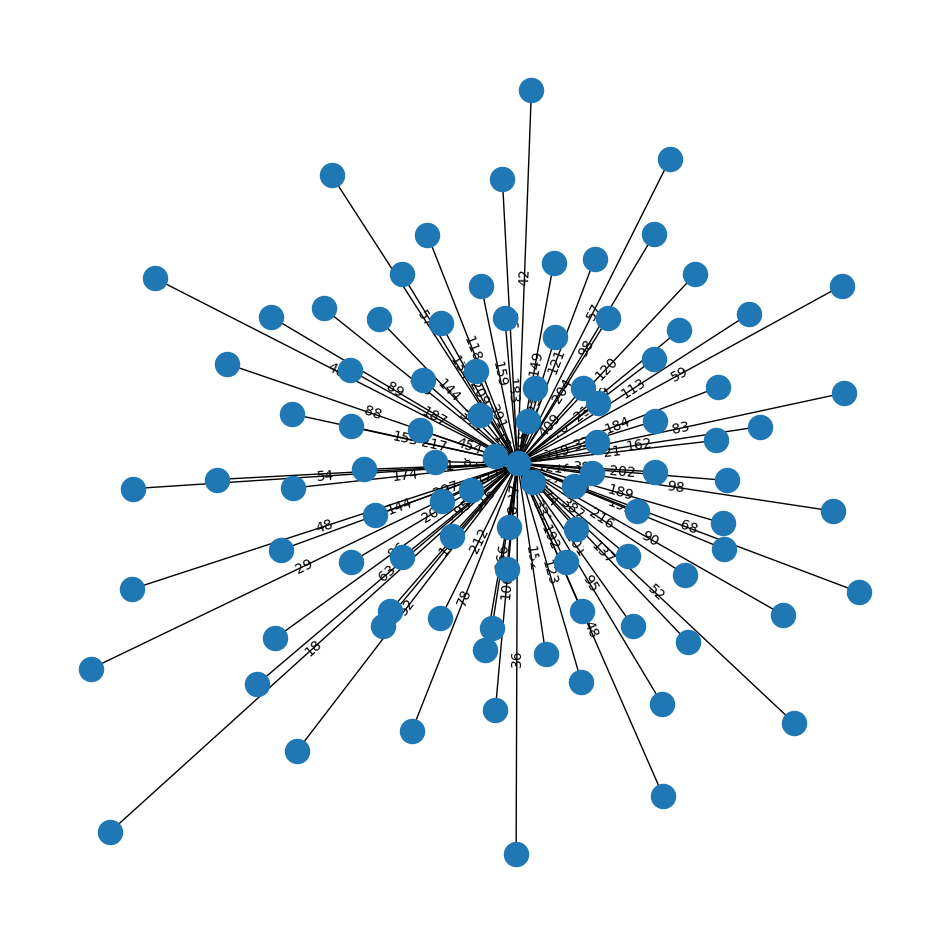

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for fst_iter in range(len(main_company_connecctions)):
  inn = main_company_connecctions[fst_iter][0]
  weight = main_company_connecctions[fst_iter][1]
  if weight != 1:
    G.add_edge('7734443270', inn, weight=weight)

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
# nx.draw_networkx_nodes(G, pos, node_size=700)

# # edges
# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )

# node labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

plt.figure(figsize=(12,12))
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw(G, pos)
plt.show()

In [ ]:
nx.draw_networkx_edge_labels?

In [ ]:
second_company_connecctions

In [ ]:
edges = []
for

In [ ]:
tst['7734443270']

[['2309085638', 1670],
 ['9705044437', 1542],
 ['7743898362', 1287],
 ['7814148471', 1210],
 ['7703270067', 1077],
 ['7730157021', 898],
 ['7704217370', 819],
 ['7728547955', 727],
 ['7811657720', 719],
 ['7707083893', 715],
 ['7736207543', 682],
 ['7721546864', 574],
 ['7743543761', 538],
 ['7704669440', 516],
 ['9705118142', 470],
 ['7702235133', 454],
 ['3328458132', 409],
 ['5258056945', 391],
 ['9718101499', 387],
 ['7702314674', 383],
 ['7710140679', 369],
 ['7707602010', 358],
 ['5003138729', 343],
 ['7702077840', 332],
 ['9703050900', 332],
 ['9705114405', 297],
 ['7724490000', 295],
 ['7710668349', 281],
 ['9701048328', 234],
 ['7718620740', 230],
 ['7705596339', 217],
 ['7740000076', 216],
 ['7708234640', 212],
 ['7707515984', 212],
 ['7812014560', 209],
 ['5047085094', 204],
 ['7704218694', 202],
 ['7706074737', 202],
 ['7702070139', 201],
 ['7453261282', 199],
 ['3329027058', 198],
 ['5032277244', 195],
 ['4345164751', 192],
 ['7728168971', 189],
 ['7704252261', 187],
 ['77

In [ ]:
connections = pd.DataFrame()
keys = list(tst.keys())
for conn in range(len(tst)):
  dataframe = pd.DataFrame(tst[keys[conn]])
  dataframe.columns = ['tgt', 'weight']
  dataframe['src'] = keys[conn]
  connections = pd.concat([connections, dataframe], axis=0)

In [ ]:
connections

In [ ]:
inn_mapping = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/inn_mapping_file.csv', encoding='cp1251', sep=';', index_col=0)
inn_mapping['ИНН'] = inn_mapping['ИНН'].astype(str)
inn_mapping['ИНН'] = np.where(inn_mapping['ИНН'].str.len() < 10, '0'+inn_mapping['ИНН'], inn_mapping['ИНН'])
okved_mapping = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/okved_mapping_file.csv', encoding='cp1251', sep=';', index_col=0)

In [ ]:
connections = pd.merge(connections, inn_mapping, left_on='tgt', right_on='ИНН', how='left')
connections.drop(['ИНН'], axis=1, inplace=True)
connections.rename(columns={'ИНН_id':'tgt_id'}, inplace=True)
connections['tgt_id'] = connections['tgt_id'].astype(np.int32)

connections = pd.merge(connections, inn_mapping, left_on='src', right_on='ИНН', how='left')
connections.drop(['ИНН'], axis=1, inplace=True)
connections.rename(columns={'ИНН_id':'src_id'}, inplace=True)
connections = connections.dropna()

connections['src_id'] = connections['src_id'].astype(np.int32)

In [ ]:
connections

In [ ]:
okveds = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/ОКВЭДЫ/Okved_Dataset-master/code_full.csv')
okveds.columns = ['sec', 'full_code', 'main', 'sup1', 'sup2', 'desc']
okveds.drop(['main', 'sup1', 'sup2'], axis=1, inplace=True)
okveds[['main','sub1','sub2']] = okveds['full_code'].str.split('.', expand=True)

okveds['full_code'] = okveds['full_code'].str.replace(' ', '').astype(str)
okveds['main'] = okveds['main'].astype(str).str.replace(' ', '').astype(str)
okveds['sub1'] = okveds['sub1'].astype(str).str.replace(' ', '').astype(str)
okveds['sub2'] = okveds['sub2'].astype(str).str.replace(' ', '').astype(str)

okveds['main.sub1'] = np.where(okveds['sub1'] != 'None', okveds['main'] + '.' + okveds['sub1'], 'None')
okveds

,sec,full_code,desc,main,sub1,sub2,main.sub1
0,A,01,"Растениеводство и животноводство, охота и пред...",01,None,None,None
1,A,01.1,Выращивание однолетних культур ...,01,1,None,01.1
2,A,01.11,"Выращивание зерновых (кроме риса), зернобобовы...",01,11,None,01.11
3,A,01.11.1,Выращивание зерновых культур ...,01,11,1,01.11
4,A,01.11.11,Выращивание пшеницы ...,01,11,11,01.11
...,...,...,...,...,...,...,...
2765,T,98.2,Деятельность недифференцированная частных дома...,98,2,None,98.2
2766,T,98.20,Деятельность недифференцированная частных дома...,98,20,None,98.20
2767,U,99,Деятельность экстерриториальных организаций и ...,99,None,None,None
2768,U,99.0,Деятельность экстерриториальных организаций и ...,99,0,None,99.0


In [ ]:
okved_connections = pd.DataFrame()

for ok1 in okveds['main'].unique():
    temp = okveds[(okveds['main'] == ok1) & (okveds['sub1'] != 'None')]
    df = pd.DataFrame()
    df['tgt'] = temp['main'] + '.' + temp['sub1']
    df['src'] = ok1
    okved_connections = pd.concat([okved_connections, df], axis=0)

for ok2 in okveds[(okveds['main.sub1'] != 'None') & (okveds['sub2'] != 'None')]['main.sub1'].unique():
    temp = okveds[(okveds['main.sub1'] == ok2) & (okveds['sub2'] != 'None')]
    df = pd.DataFrame()
    df['tgt'] = ok2 + '.' + temp['sub2']
    df['src'] = ok2
    okved_connections = pd.concat([okved_connections, df])

okved_connections = okved_connections.drop_duplicates()
okved_connections = okved_connections.reset_index(drop=True)
okved_connections

,tgt,src
0,01.1,01
1,01.11,01
2,01.12,01
3,01.13,01
4,01.14,01
...,...,...
2677,95.29.6,95.29
2678,95.29.7,95.29
2679,95.29.9,95.29
2680,96.02.1,96.02


In [ ]:
okved_mapping = pd.read_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/okved_mapping_file.csv', encoding='cp1251', sep=';', index_col=0)
okved_mapping.columns = ['okved', 'okved_id']
okved_mapping

,okved,okved_id
0,70.10.2,978
1,45.11.2,565
2,47.30,741
3,09.10,89
4,42.12,530
...,...,...
12046,63.11.1,888
12047,10.71,131
12048,47.25.1,736
12049,68.20,956


In [ ]:
okved_connections

,tgt,src
0,01.1,01
1,01.11,01
2,01.12,01
3,01.13,01
4,01.14,01
...,...,...
2677,95.29.6,95.29
2678,95.29.7,95.29
2679,95.29.9,95.29
2680,96.02.1,96.02


In [ ]:
okved_mapping = okved_mapping.drop_duplicates()

In [ ]:
okved_connections_final = pd.merge(okved_connections, okved_mapping, left_on='tgt', right_on='okved', how='right').drop_duplicates().dropna()
okved_connections_final.drop(['okved'], axis=1, inplace=True)
okved_connections_final.rename(columns={'okved_id':'tgt_id'}, inplace=True)

okved_connections_final = pd.merge(okved_connections_final, okved_mapping, left_on='src', right_on='okved', how='right').drop_duplicates().dropna()
okved_connections_final.drop(['okved'], axis=1, inplace=True)
okved_connections_final.rename(columns={'okved_id':'src_id'}, inplace=True)
okved_connections_final['src_id'] = okved_connections_final['src_id'].astype(np.int32)
okved_connections_final['tgt_id'] = okved_connections_final['tgt_id'].astype(np.int32)

okved_connections_final = okved_connections_final.reset_index(drop=True)
okved_connections_final

,tgt,src,tgt_id,src_id
0,47.30.11,47.30,742,741
1,09.10.1,09.10,90,89
2,09.10.9,09.10,92,89
3,09.10.2,09.10,91,89
4,35.12.1,35.12,494,493
...,...,...,...,...
532,14.14.1,14.14,174,173
533,62.03.13,62.03,884,883
534,32.99.1,32.99,477,476
535,32.99.8,32.99,478,476


### Создание графа DGL

In [ ]:
feauters = dataset[['ИНН_id', 'ОКОПФ_CAT', 'АДРЕС_BERT', 'ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ_BERT', 'ОКАТО_BERT']]
feauters = feauters.sort_values(by='ИНН_id')
feauters

,ИНН_id,ОКОПФ_CAT,АДРЕС_BERT,ПОЛНОЕ НАЗВАНИЕ ОРГАНИЗАЦИИ_BERT,ОКАТО_BERT
9971,0,30,[ 3.20070349e-02 2.16948707e-02 -5.26563860e-...,[-4.10140455e-02 3.48700546e-02 -9.12996531e-...,[ 3.51740010e-02 3.98090109e-02 -6.62369877e-...
3289,1,30,[ 3.86010483e-02 4.59013060e-02 -3.54840085e-...,[-4.93265055e-02 6.31346479e-02 -4.65728641e-...,[ 2.79385038e-02 1.35741755e-02 -3.86569798e-...
1631,2,59,[ 2.57943589e-02 7.61864483e-02 -5.24485223e-...,[ 3.39088775e-02 5.08299097e-02 -2.16643643e-...,[ 3.11159994e-03 4.63605598e-02 -6.42549917e-...
5658,3,30,[ 1.81130227e-03 6.94240779e-02 -5.65517023e-...,[-3.74098569e-02 6.91239610e-02 -3.85450087e-...,[ 3.11159994e-03 4.63605598e-02 -6.42549917e-...
3495,4,27,[ 3.02148275e-02 6.54854104e-02 -3.29367146e-...,[-5.04156388e-02 2.80565023e-02 -1.01568475e-...,[ 3.11159994e-03 4.63605598e-02 -6.42549917e-...
...,...,...,...,...,...
4348,11535,30,[ 3.37806903e-02 5.88944815e-02 -5.43720052e-...,[ 3.41911614e-02 3.75274159e-02 -3.51932980e-...,[ 4.49213088e-02 9.37841535e-02 -1.69843528e-...
4132,11536,30,[ 4.15070765e-02 7.44684190e-02 -1.96351781e-...,[ 1.36092855e-02 2.68918532e-03 -7.80289844e-...,[ 4.83677275e-02 8.61631036e-02 -9.37674008e-...
2929,11537,30,[ 2.27879677e-02 7.23352879e-02 -3.43978754e-...,[ 8.17361288e-03 4.30483408e-02 -4.36264910e-...,[ 3.26448008e-02 8.95858109e-02 -5.65765100e-...
1025,11538,30,[ 3.90790552e-02 5.89153469e-02 2.56011193e-...,[ 5.78240715e-02 5.94451874e-02 -6.00547381e-...,[ 3.26448008e-02 8.95858109e-02 -5.65765100e-...


In [ ]:
okved_connections_final

,tgt,src,tgt_id,src_id
0,47.30.11,47.30,742,741
1,09.10.1,09.10,90,89
2,09.10.9,09.10,92,89
3,09.10.2,09.10,91,89
4,35.12.1,35.12,494,493
...,...,...,...,...
532,14.14.1,14.14,174,173
533,62.03.13,62.03,884,883
534,32.99.1,32.99,477,476
535,32.99.8,32.99,478,476


In [ ]:
data_dict = {
    ('company', 'main', 'okved'): (torch.from_numpy(dataset['ИНН_id'].to_numpy()), (torch.from_numpy(dataset['ОСНОВНОЙ ОКВЕД_id'].to_numpy()))),
    ('company', 'related', 'company'): (torch.from_numpy(connections['tgt_id'].to_numpy()), (torch.from_numpy(connections['src_id'].to_numpy()))),
    ('okved', 'child', 'okved'): (torch.from_numpy(okved_connections_final['src_id'].to_numpy()), (torch.from_numpy(okved_connections_final['tgt_id'].to_numpy())))
}

In [ ]:
g = dgl.heterograph(data_dict)
g

Graph(num_nodes=1162, num_edges=537,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
g.nodes['company'].data['label'] = torch.from_numpy(np.asarray([1]*11540))
g.nodes['okved'].data['label'] = torch.from_numpy(np.asarray([2]*1182))

In [ ]:
g.ndata

defaultdict(<class 'dict'>, {'label': {'company': tensor([1, 1, 1,  ..., 1, 1, 1]), 'okved': tensor([2, 2, 2,  ..., 2, 2, 2])}})

In [ ]:
from dgl.data.utils import save_graphs
save_graphs("/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/data_vis.bin", G)

In [ ]:
G = dgl.to_homogeneous(g)

In [ ]:
G.ndata

{'_ID': tensor([   0,    1,    2,  ..., 1179, 1180, 1181]), '_TYPE': tensor([0, 0, 0,  ..., 1, 1, 1])}

In [ ]:
import dgl.data
import matplotlib.pyplot as plt
import networkx as nx

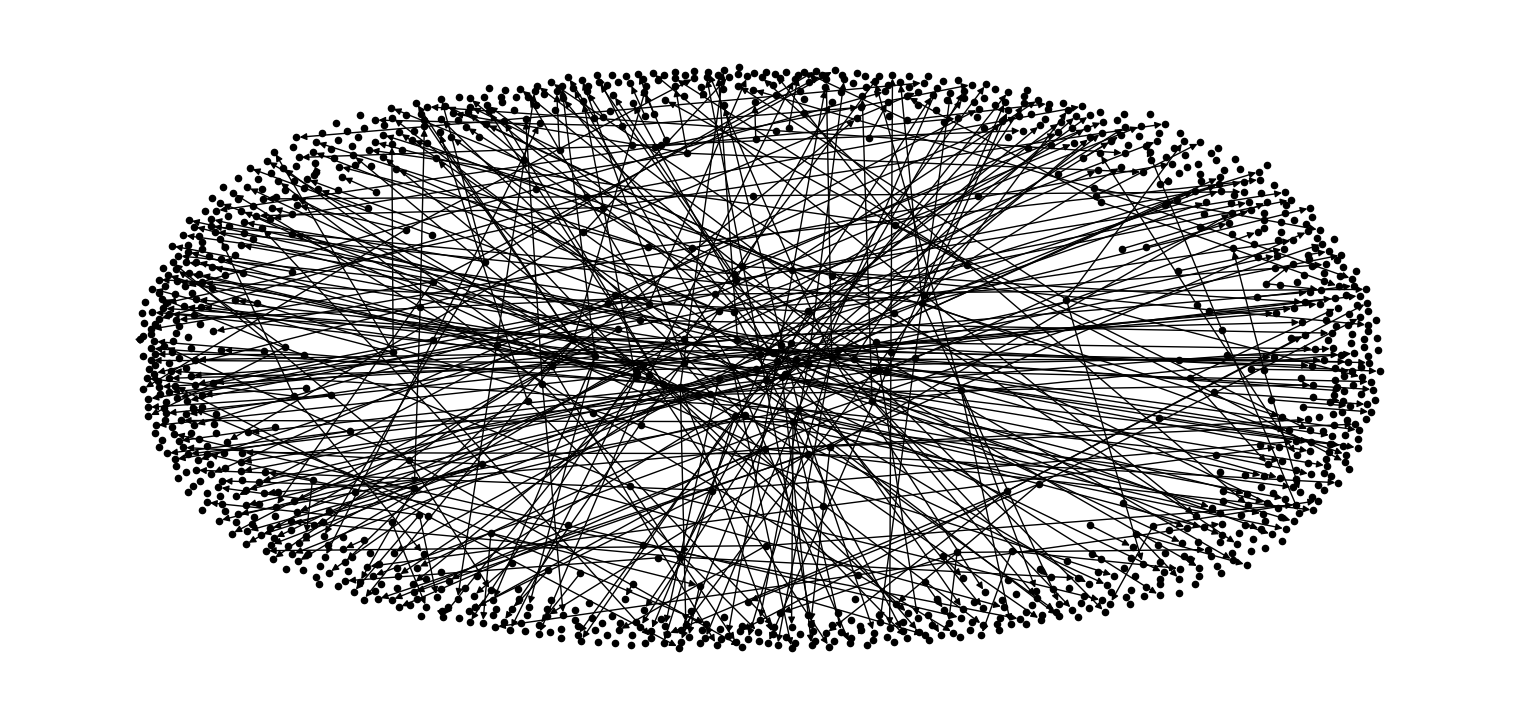

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'width': 1,
}
G = dgl.to_networkx(g)
plt.figure(figsize=[15,7])
nx.draw(G, **options)